In [121]:
### IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [122]:
### READING THE DATA
df = pd.read_csv('Microsoft dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


In [123]:
### DISPLAYING THE DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9632 entries, 0 to 9631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9632 non-null   object 
 1   Open       9632 non-null   float64
 2   High       9632 non-null   float64
 3   Low        9632 non-null   float64
 4   Close      9632 non-null   float64
 5   Adj Close  9632 non-null   float64
 6   Volume     9632 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 526.9+ KB


In [124]:
### CHECKING FOR MISSING VALUES
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [125]:
### SUMMARY STATISTICS
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9632.000000,9632.000000,9632.000000,9632.000000,9632.000000,9.632000e+03
mean,56.808047,57.396715,56.203807,56.820997,51.194432,5.693254e+07
std,86.835233,87.652713,85.966316,86.849717,86.831026,3.814073e+07
min,0.088542,0.092014,0.088542,0.090278,0.055765,2.304000e+06
25%,5.669922,5.732422,5.578125,5.656250,3.493896,3.226575e+07
50%,27.280001,27.540001,27.040001,27.298437,19.147190,5.005870e+07
75%,46.376250,46.892500,45.845312,46.360001,37.789997,7.090860e+07
max,432.970001,433.600006,427.160004,430.519989,430.519989,1.031789e+09


In [126]:
### CONVERTING THE DATE COLUMN TO DATETIME AND SETTING IT AS INDEX
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


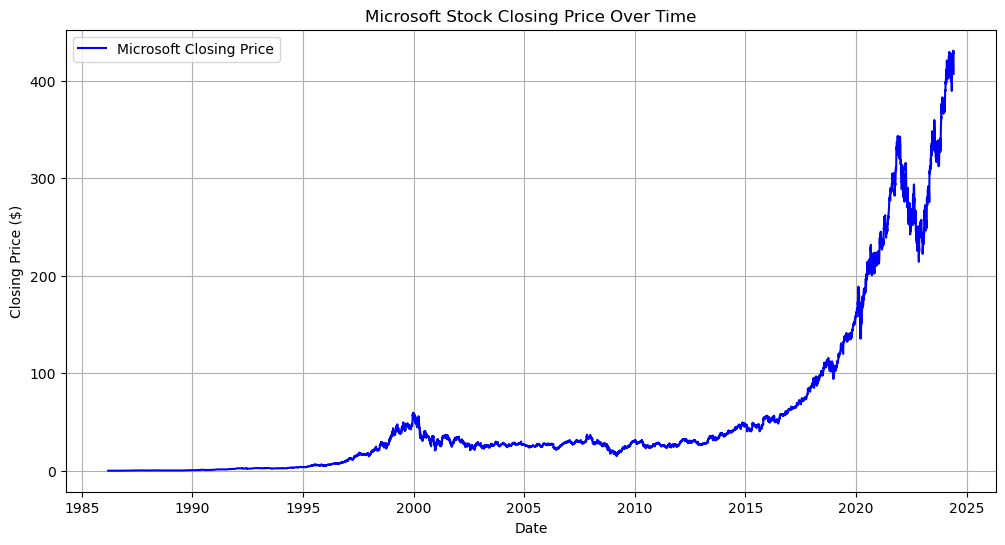

In [127]:
### VISUALIZING CLOSING PRICE
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Microsoft Closing Price', color='blue')
plt.title('Microsoft Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

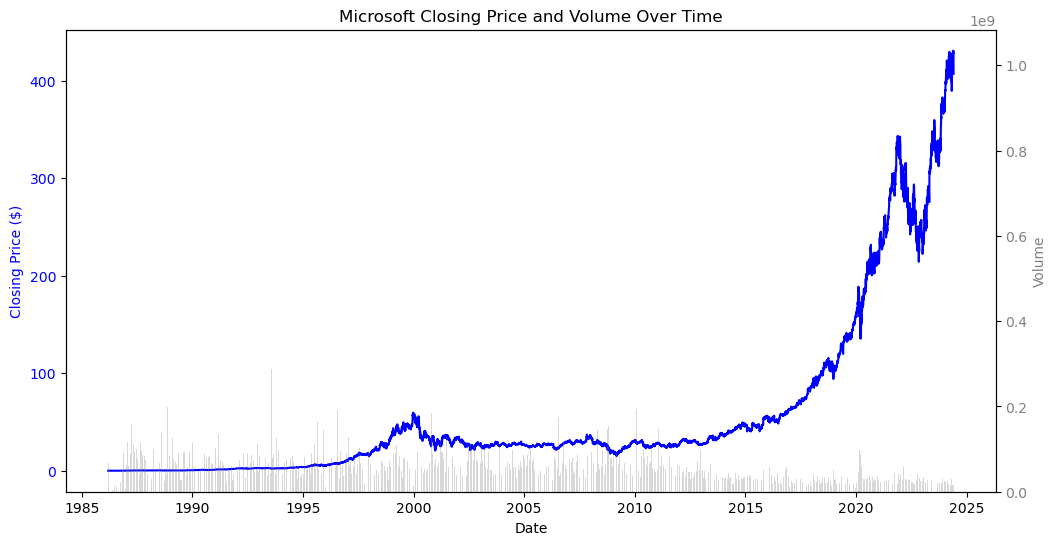

In [128]:
### VISUALIZING CLOSING PRICE AND VOLUME
fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(df['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='grey', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Microsoft Closing Price and Volume Over Time')
plt.show()

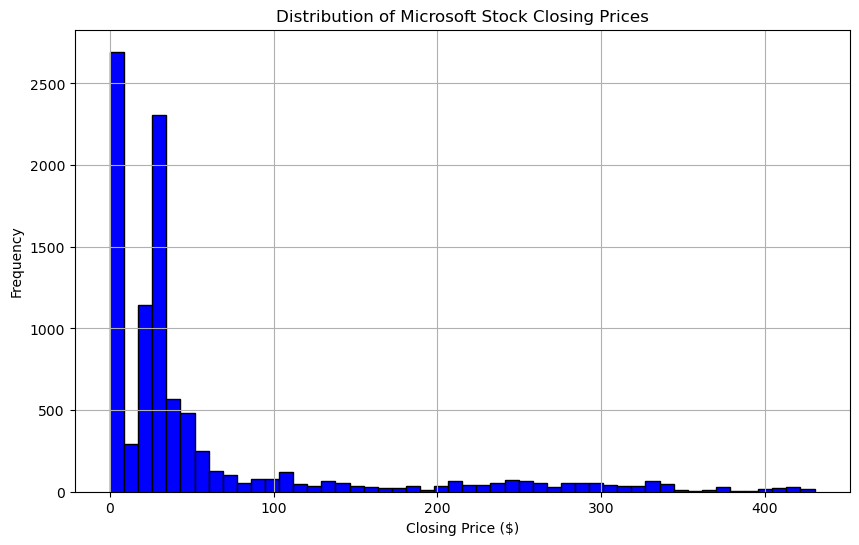

In [129]:
### CLOSING PRICE DISTRIBUTION
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Microsoft Stock Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

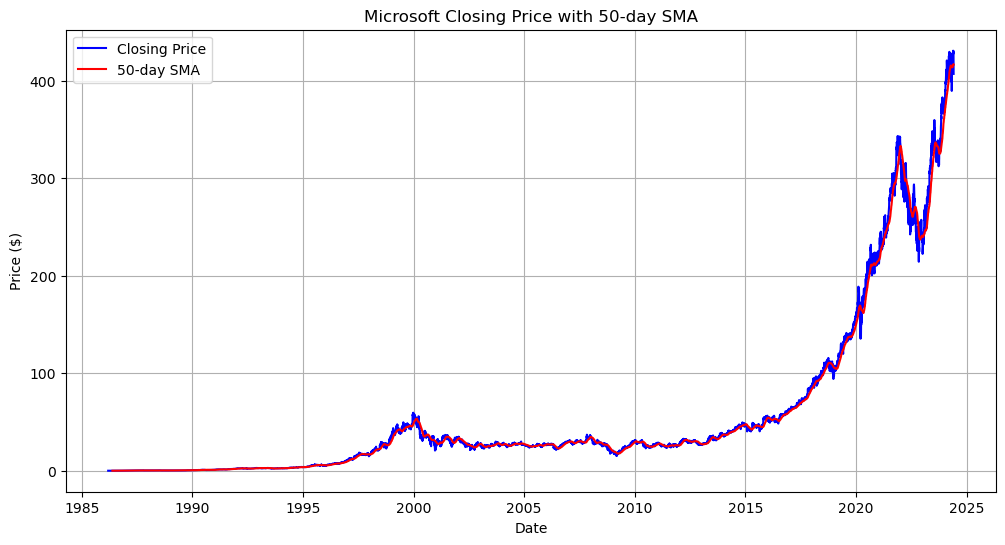

In [130]:
### SIMPLE MOVING AVERAGE
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Plot the closing price and 50-day SMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['SMA_50'], label='50-day SMA', color='red')
plt.title('Microsoft Closing Price with 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

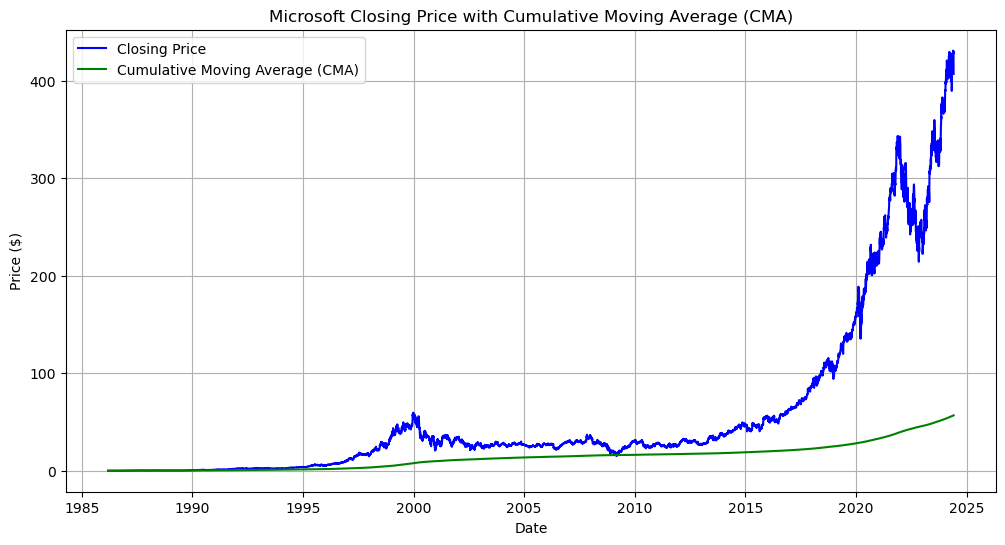

In [131]:
### CUMMULATIVE MOVING AVERAGE
df['CMA'] = df['Close'].expanding().mean()

# Plot the closing price and CMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['CMA'], label='Cumulative Moving Average (CMA)', color='green')
plt.title('Microsoft Closing Price with Cumulative Moving Average (CMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

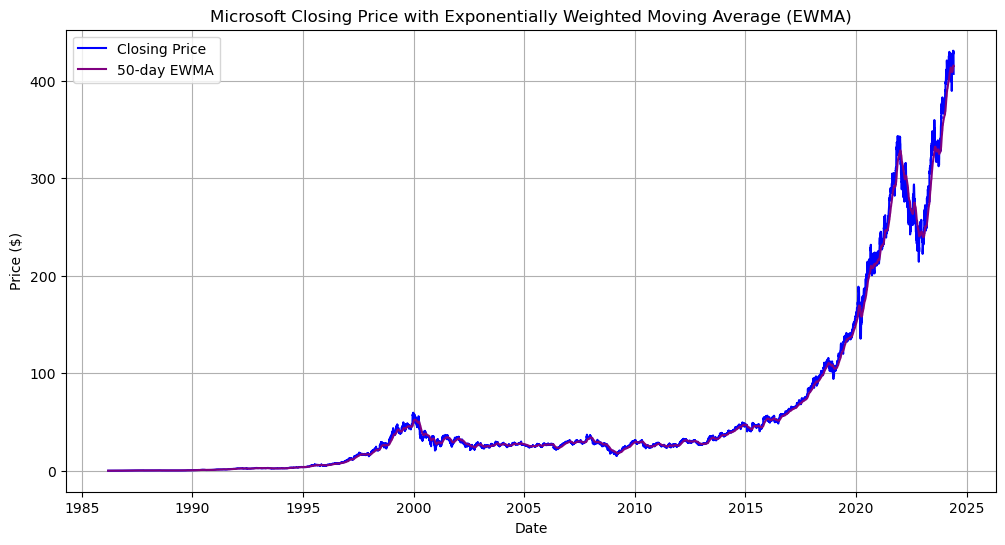

In [132]:
#### EXPONENTIAL WEIGHTED MOVING AVERAGE
df['EWMA'] = df['Close'].ewm(span=50, adjust=False).mean()

# Plot the closing price and EWMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['EWMA'], label='50-day EWMA', color='purple')
plt.title('Microsoft Closing Price with Exponentially Weighted Moving Average (EWMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

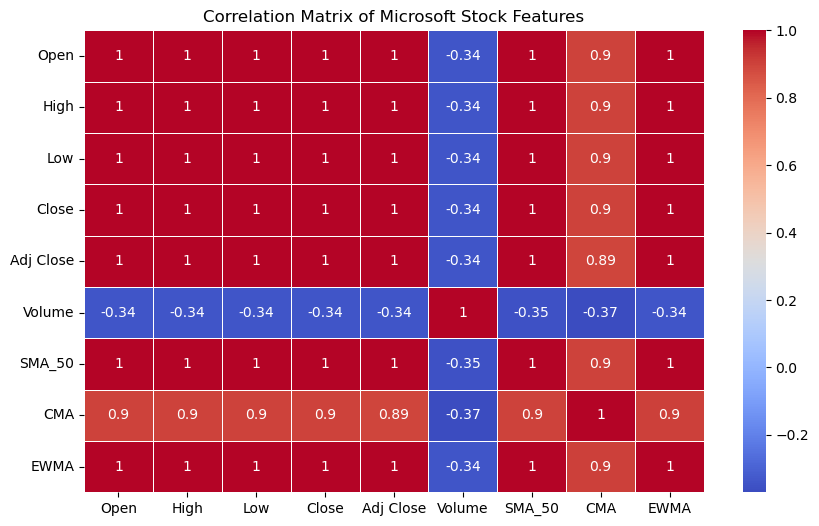

In [133]:
### CORRELATION ANALYSIS
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Microsoft Stock Features')
plt.show()

<Figure size 1200x800 with 0 Axes>

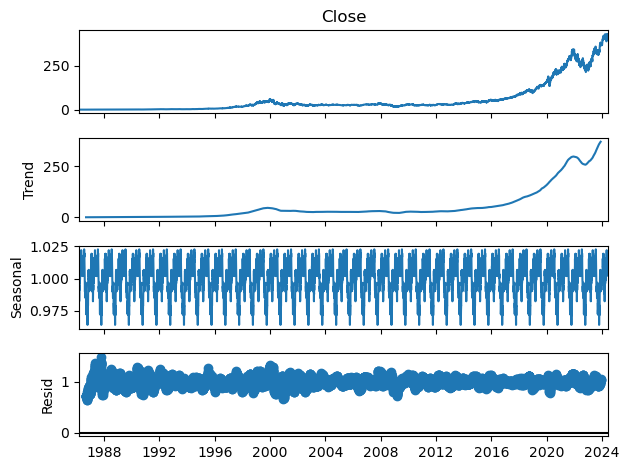

In [134]:
### VISUALISING THE TREND, SEASONALITY AND RESIDUAL OF THE PRICE
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  


plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

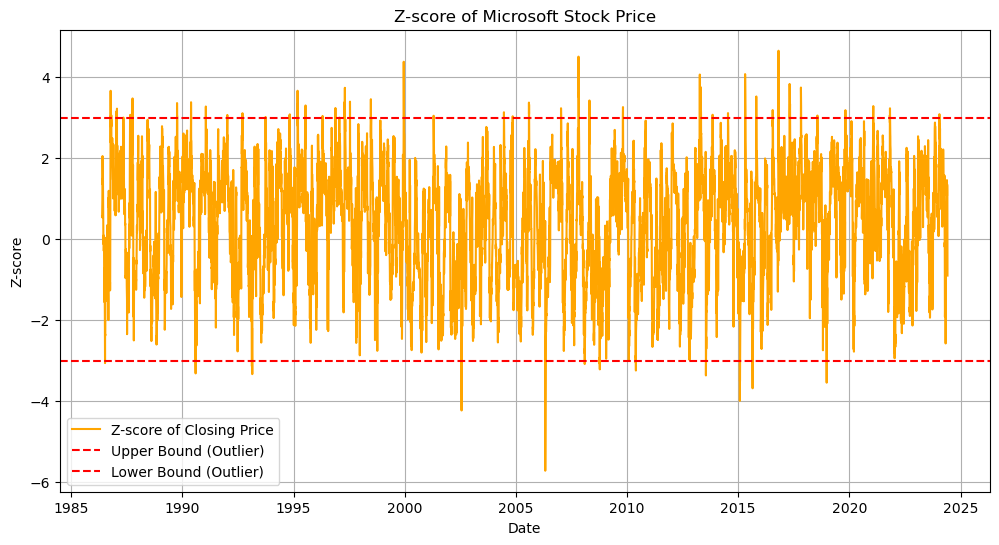

In [135]:
### DETECTING OUTLIERS AND VISUALIZING THE STOCK PRICE WITH ROLLING Z SCORES
rolling_mean = df['Close'].rolling(window=50).mean()
rolling_std = df['Close'].rolling(window=50).std()

### COMPUTING THE Z SCORES
df['Z-score'] = (df['Close'] - rolling_mean) / rolling_std

### PLOTTING THE Z SCORES TO DETECT ANOMALIES
plt.figure(figsize=(12, 6))
plt.plot(df['Z-score'], label='Z-score of Closing Price', color='orange')
plt.axhline(y=3, color='red', linestyle='--', label='Upper Bound (Outlier)')
plt.axhline(y=-3, color='red', linestyle='--', label='Lower Bound (Outlier)')
plt.title('Z-score of Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
### FILTERING DATA BETWEEN 2017-2024
df_filtered = df.loc['2017-01-01':'2024-01-01']

df_filtered.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,CMA,EWMA,Z-score
Date,,,,,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,56.930576,20694100,60.9532,21.080926,61.013380,1.067877
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.675835,21340000,61.0060,21.086232,61.063835,0.849408
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.675835,24876000,61.0320,21.091536,61.112312,0.826402
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.167099,19922900,61.0690,21.096908,61.180065,1.138549
2017-01-09,62.759998,63.080002,62.540001,62.639999,56.985161,20382700,61.1092,21.102254,61.237317,0.975144


In [137]:
### FINDING THE DATE OF THE MAXIMUM PRICE
max_price = df_filtered['Close'].max()
max_date = df_filtered['Close'].idxmax()
print('The maximum price is', max_price, 'on', max_date)

The maximum price is 382.700012 on 2023-11-28 00:00:00


In [138]:
### FINDING THE DATE OF THE MINIMUM PRICE
min_price = df_filtered['Close'].min()
min_date = df_filtered['Close'].idxmin()
print('The minimum price is', min_price, 'on', min_date)

The minimum price is 62.299999 on 2017-01-04 00:00:00
